## Observations and Insights 

what was the main issue and how did my finding work to solve the question?



In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
import scipy.stats as st

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to load
mouse_metadata_path = "mouse_metadata.csv"
study_results_path = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)




In [20]:
mouse_metadata_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [21]:
study_results_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [22]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how = "left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [24]:
#combined_df.isna().sum()

In [25]:
#combined_df.dtypes

In [26]:
#remove g989 beceause of dup time points
print(combined_df['Mouse ID'].value_counts())
combined_df[combined_df['Mouse ID'] == 'g989']

g989    13
y865    10
u327    10
k382    10
n304    10
        ..
b447     1
o848     1
x336     1
t573     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_ID_clean = combined_df[combined_df['Mouse ID'] != 'g989']
mouse_ID_clean



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
mouse_ID_clean.sort_values(["Mouse ID","Timepoint"], inplace =True) 

# dropping ALL duplicte values 
mouse_ID_clean.drop_duplicates(keep = False, inplace = True) 

# displaying data 
mouse_ID_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
mouse_ID_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [30]:
#reset index

new_index_df=mouse_ID_clean.reset_index(drop=True)

new_index_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [31]:
# Checking the number of mice in the clean DataFrame.

mouse_ID_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [32]:
#new_index_df.describe()

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

merge_data = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

data_sort.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#Tumor_stats = data_sort.groupby(["mean","median"]) ["Tumor Volume(mm3)"].mean()
# This method produces everything in a single groupby function

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 

tumor_stats = data_sort.groupby(["Drug Regimen"])
tumor_stats

#create a variable to capture the total tumor volume for each regimen
#tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean 
tumor_mean = tumor_stats["Tumor Volume (mm3)"].mean()

#Create computation for the median 
tumor_median = tumor_stats["Tumor Volume (mm3)"].median()

#Create computation for the variance 
tumor_variance = tumor_stats["Tumor Volume (mm3)"].var()

#create computation for the standard deviation o
tumor_std = tumor_stats["Tumor Volume (mm3)"].std()
#create computation for the SEM
tumor_sem = tumor_stats["Tumor Volume (mm3)"].sem()

In [63]:
summary_stats = pd.DataFrame ({"Mean": tumor_mean, "Median":tumor_median, "Variance":tumor_variance, "Standard Deviation": tumor_std, "SEM": tumor_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [64]:
#Determine the datapoints for drug regimen and Mouse ID
regimen_data = merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

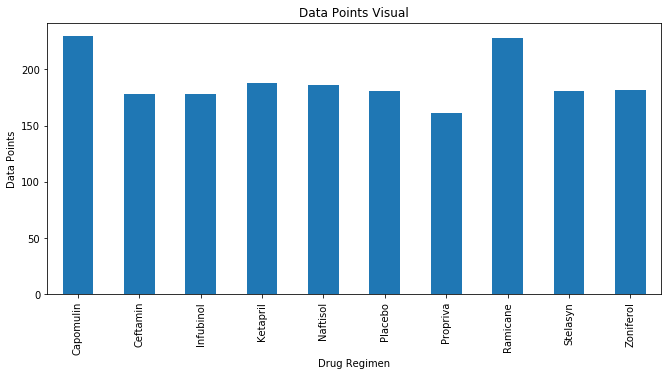

<Figure size 432x288 with 0 Axes>

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimen_data.plot(kind="bar", figsize=(11,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

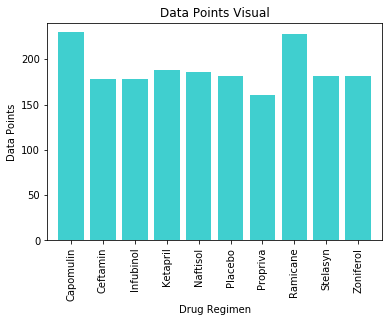

In [66]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(regimen_data))
                   
plt.bar(x_axis, users, color='c', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
gender_dist = merge_data.groupby(["Mouse ID","Sex"])
gender_dist

mouse_gender_df = pd.DataFrame(gender_dist.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


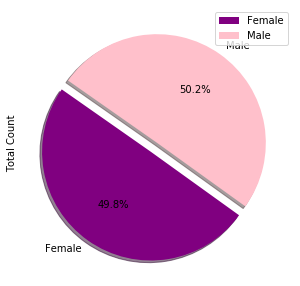

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#plot data frame .plot.pie (sumplots true)autopct="%1.1f%%"
colors = ['purple', 'pink']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=145, explode = explode, shadow = True,autopct="%1.1f%%")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

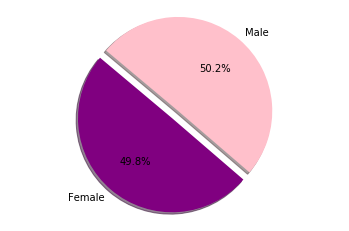

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['purple', 'pink']

#Determine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_t_vol = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_t_vol = final_t_vol.sort_values(["Timepoint"], ascending=True)
final_t_vol

final_t_vol_data = final_t_vol[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

final_t_vol_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


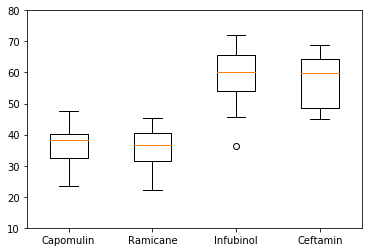

In [71]:

#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement

    
final_t_vol_sort = final_t_vol_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
final_t_vol_sort.head()


# Turn retrieved data into dataframe to easily manipulate
final_tumor_df = final_t_vol_sort.to_frame()
final_tumor_df

#Create a list to use as labels and dataframe
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = final_tumor_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(drugs)
tumor_vol = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vol, labels=drugs)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

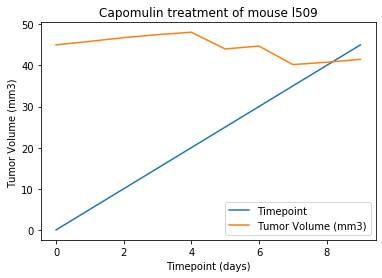

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Import Dependencies
time_vs_tumor = merge_data[merge_data["Mouse ID"].isin(["l509"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3) ");


In [79]:
TV_list = final_plot['Tumor Volume (mm3)'].tolist()
TP_list = final_plot['Timepoint'].tolist()

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_treatment = mouse_ID_clean.loc[mouse_ID_clean["Drug Regimen"]== "Capomulin"]

capomulin_average = capomulin_treatment.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

NameError: name 'mouse_ID_clean' is not defined

In [9]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_treatment_df = final_tumor_df["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_treatment.reset_index()

capomulin_group_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_group_plot = pd.DataFrame(capomulin_group_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_treatment = capo_group_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
#capomulin_scatter

mouse_weight = mouse_ID_clean.weight (g)
tumor_volume = mouse_ID_clean.Tumor_Volume(mm3)
plt.scatter(malic_acid,flavanoids)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

NameError: name 'mouse_ID_clean' is not defined

## Correlation and Regression

In [86]:
TV_list = line_plot_final['Tumor Volume (mm3)'].tolist()
TP_list = line_plot_final['Timepoint'].tolist()

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_group_plot["Weight (g)"]
y_values = capomulin_group_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()

NameError: name 'capomulin_group_plot' is not defined